Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Read the dataset and perform initial exploratory data analysis:

In [2]:
df= pd.read_csv(r"C:\Users\WAGHMARE\Downloads\archive (8)\car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [12]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

Explore categorical features:

In [13]:
categorical_col = ['Fuel_Type','Selling_type','Transmission']
for col in categorical_col:
    print(f"Category in {col} is : {df[col].unique()}")

Category in Fuel_Type is : ['Petrol' 'Diesel' 'CNG']
Category in Selling_type is : ['Dealer' 'Individual']
Category in Transmission is : ['Manual' 'Automatic']


Visualize numerical features:

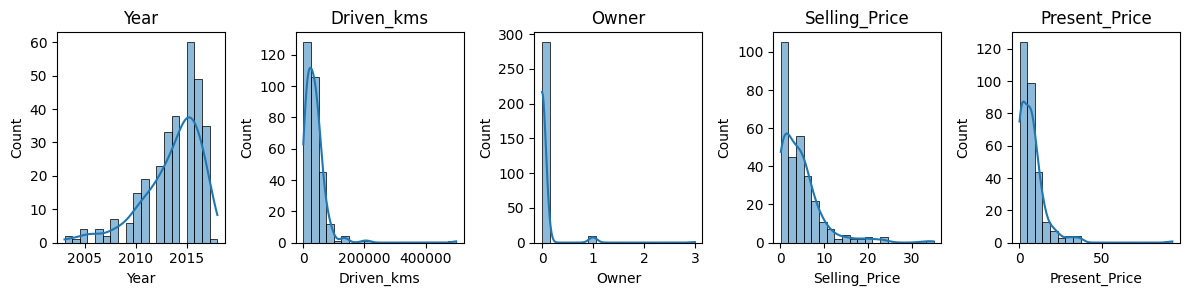

In [14]:
numerical_features=['Year','Driven_kms','Owner','Selling_Price','Present_Price']
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

Price Analysis visualization:

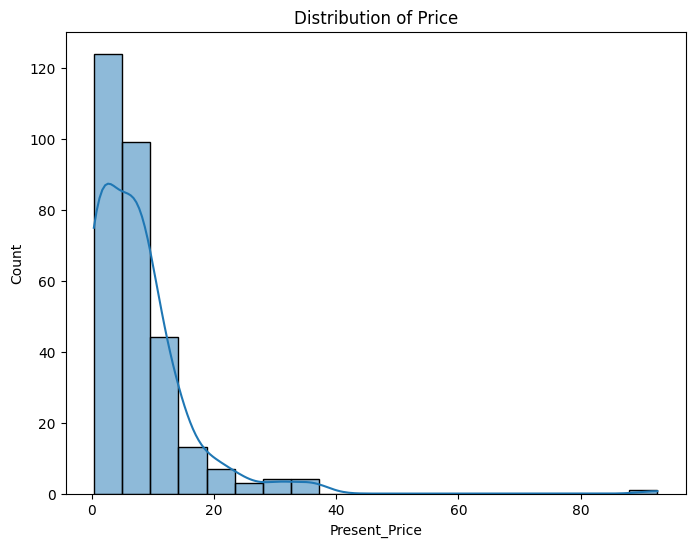

In [15]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Present_Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

Categorical Feature vs. Price visualization:

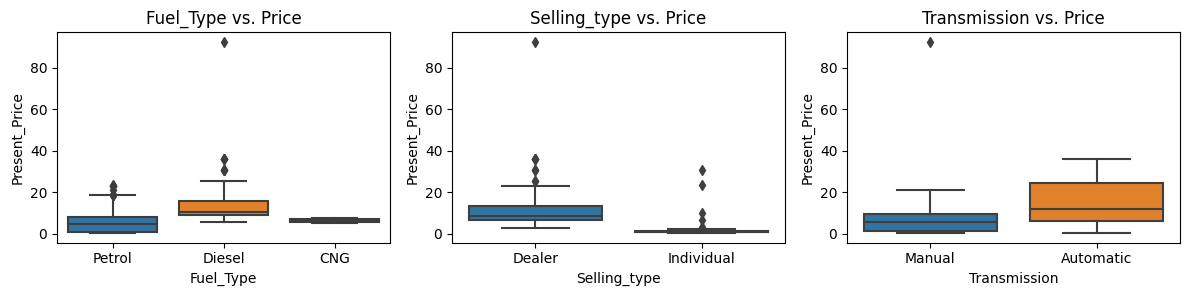

In [16]:
categorical_col = ['Fuel_Type','Selling_type','Transmission']
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_col:
    plt.subplot(3, 3, categorical_col.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Present_Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

Correlation Analysis visualization:

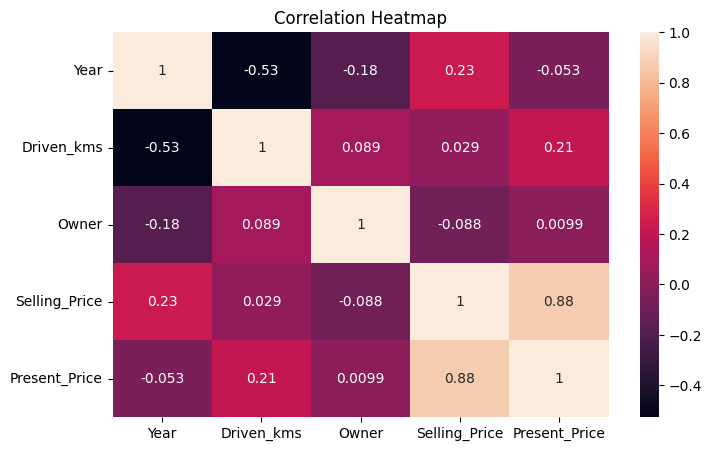

In [17]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Data preprocessing and linear regression model training:

In [18]:
dfnew = pd.get_dummies(df)
dfnew=dfnew.astype(int)
dfnew

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3,5,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4,9,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7,9,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2,4,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4,6,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9,11,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4,5,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3,11,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11,12,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [19]:
x=dfnew.drop(['Present_Price'],axis=1)
y=dfnew['Present_Price']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
model=LinearRegression()

In [22]:
model.fit(xtrain,ytrain)

LinearRegression()

Model evaluation:

In [23]:
ypred=model.predict(xtest)
ypred

array([ 1.13694719e+01,  1.11711593e+01, -9.92620391e-02,  8.99114922e+00,
        1.62727968e+01,  5.45801087e+00,  1.49408293e+01,  8.25341583e-01,
        8.07975368e+00,  2.66607866e+00,  2.54401594e+01,  1.61026711e-01,
        3.42904527e+00,  1.85135160e+00,  6.34121741e+00,  7.00045870e+00,
       -4.83446510e-01,  1.06783286e+00,  3.89068203e+01,  8.48216048e-02,
       -2.13580580e-02,  2.59135257e+00,  6.75985026e+00,  4.05044610e+00,
        7.55054024e+00,  1.20718809e+01,  1.16429133e+01,  1.03125929e+00,
        7.96249993e+00,  8.11671848e+00,  4.43864847e+00,  6.89276573e+00,
        7.54391463e+00,  6.31222523e+00,  4.53892592e+00,  6.86937736e+00,
        9.59057122e-01,  4.64969223e+00,  2.61517491e+00,  1.59078426e+01,
        1.48899852e+01,  1.69806492e+01,  2.36628978e+00,  7.02647623e+00,
        1.97852294e+00,  5.00435256e-01,  1.28509724e+01,  6.35116612e+00,
        7.65903073e+00,  2.48781895e+00, -5.93384859e-02,  2.08021117e+00,
        5.83283598e+00,  

Baseline model prediction and evaluation:

In [24]:
mse = mean_squared_error(ytest, ypred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.381229466018203


In [25]:
# Baseline model prediction (using mean)
ymean = ytrain.mean()
ypred_baseline = [ymean] * len(ytest)

# Calculate MSE for the baseline model
mse_baseline = mean_squared_error(ytest, ypred_baseline)
print(f'Mean Squared Error (Baseline): {mse_baseline}')


Mean Squared Error (Baseline): 55.31651640085666


In [26]:
# Display a few predictions and actual values side by side
predictions_vs_actual = pd.DataFrame({'Predicted': ypred, 'Actual': ytest})
print(predictions_vs_actual)


     Predicted  Actual
283  11.369472      11
267  11.171159       9
166  -0.099262       0
9     8.991149       8
78   16.272797      22
280   5.458011       5
95   14.940829      18
111   0.825342       1
5     8.079754       9
175   2.666079       0
99   25.440159      20
197   0.161027       0
186   3.429045       0
156   1.851352       0
58    6.341217       6
61    7.000459       7
149  -0.483447       0
110   1.067833       1
64   38.906820      36
142   0.084822       0
157  -0.021358       0
106   2.591353       3
249   6.759850       7
47    4.050446       4
43    7.550540       8
277  12.071881      13
282  11.642913      14
118   1.031259       1
215   7.962500       9
238   8.116718       9
18    4.438648       5
241   6.892766       7
34    7.543915       8
25    6.312225       4
46    4.538926       4
7     6.869377       8
115   0.959057       1
196   4.649692       0
113   2.615175       1
94   15.907843      22
76   14.889985      14
83   16.980649      13
120   2.366

R-squared, RMSE, and scatter plot visualizations:

In [27]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your actual and predicted values, respectively
r_squared = r2_score(ytest, ypred)

print(f'R-squared: {r_squared}')


R-squared: 0.8292631793206127


In [28]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 3.062879277088505


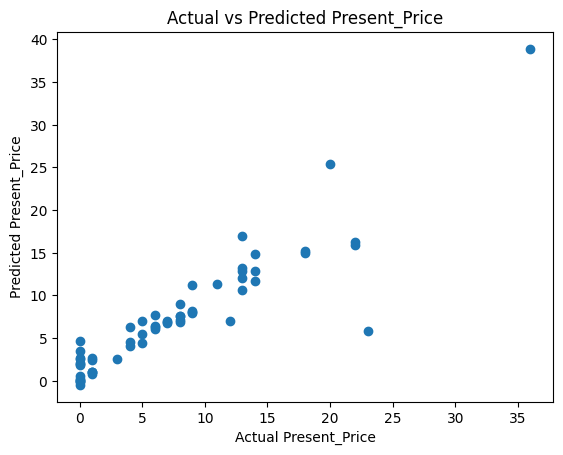

In [29]:
import matplotlib.pyplot as plt

plt.scatter(ytest, ypred)
plt.xlabel('Actual Present_Price')
plt.ylabel('Predicted Present_Price')
plt.title('Actual vs Predicted Present_Price')
plt.show()


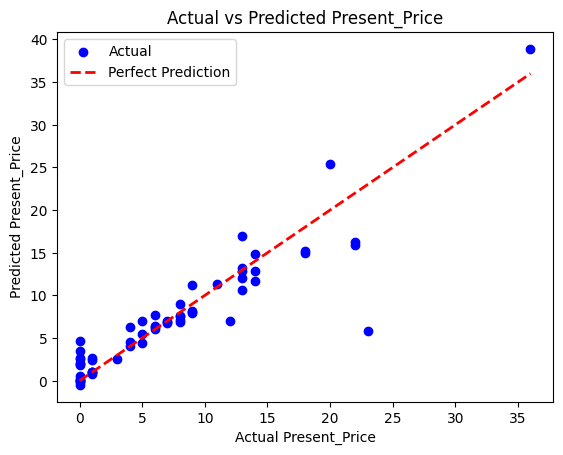

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(ytest, ypred, color='blue', label='Actual')  # Actual values in blue
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')  # Diagonal line for perfect prediction
plt.xlabel('Actual Present_Price')
plt.ylabel('Predicted Present_Price')
plt.title('Actual vs Predicted Present_Price')
plt.legend()
plt.show()